<a href="https://colab.research.google.com/github/smkandel/Projects/blob/main/Copy_of_Copy_of_Stock_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/EUR_STOCK_DATA.csv")

In [ ]:
df.tail()

,Gmt time,Volume,Open,High,Low,Close,SMA,CumulativeSum,CMA,EMA
12885,2020-11-12 04:00:00,19540.22,1.607955,1.608915,1.604095,1.605455,1.615376,19518.466945,1.514703,1.614459
12886,2020-11-12 08:00:00,48969.47,1.605465,1.611820,1.605225,1.609935,1.614031,19520.076880,1.514711,1.613636
12887,2020-11-12 12:00:00,49848.50,1.609930,1.611365,1.606575,1.606745,1.612224,19521.683625,1.514718,1.612383
12888,2020-11-12 16:00:00,23094.53,1.606720,1.609540,1.605880,1.607315,1.611069,19523.290940,1.514725,1.611462
12889,2020-11-12 20:00:00,5512.42,1.607310,1.608910,1.606925,1.607785,1.610012,19524.898725,1.514732,1.610793


In [ ]:
print(type(df["Gmt time"].iloc[0]))

<class 'str'>


In [ ]:
# BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
df['Gmt time']=pd.to_datetime(df['Gmt time'])

def return_data_for_period():
  date1=input("Enter first Date for time period format D.M.Y :- ")
  date2=input("Enter Second Date for time period format D.M.Y :- ")
  # 0th index has date 1st has Month 2nd has year
  # 2012-12-17 04:00:00 .datetime()
  # 2012-12-17 .date()
  date1=date1.split(".")
  date2=date2.split(".")
  date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
  date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
  date_filt1=df[df["Gmt time"]>date1]
  return date_filt1[date_filt1["Gmt time"]<date2]

In [ ]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

Enter first Date for time period format D.M.Y :- 12122012
Enter Second Date for time period format D.M.Y :- 11122020


IndexError: ignored

Enter first Date for time period format D.M.Y :- 14.12.2012
Enter Second Date for time period format D.M.Y :- 19.12.2012


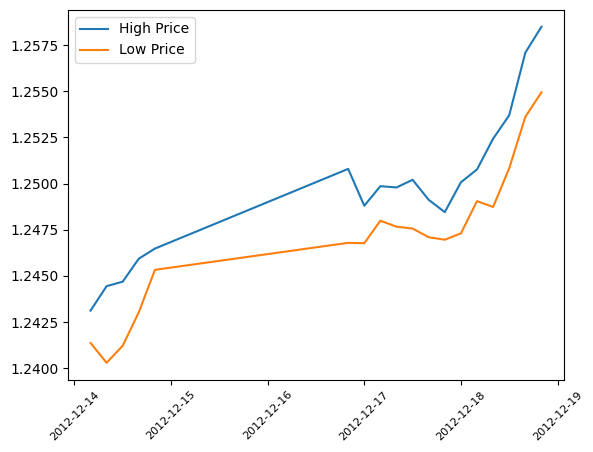

In [ ]:
low_high_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['High'],label="High Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Low'],label="Low Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [ ]:
# Data Preprocessing and Cleaning and EDA
# Making More features from current features to help the model learn better

In [ ]:
# Plot Open vs Close Between any time period entered by the user
# Plot High vs Low Between any time period entered by the user
# Check which months over the year had highest Volume
# Study what are technical Indicators
# See Seasonal Trends in Closing Price and Find out the months for high Volitality

In [ ]:
# Check which months over the year had highest Volume
# caluclate mean volume for each month each year
# 1 data frames that has 12 jan,feb,march,april,may,june,july..... and rows will be number of year

In [ ]:
def find_data_for_all_months(column_to_mean):
  years=[]
  all_months_data=[]
  for index in range(8):
    years.append(2012+index)

  for k in range(1,13):
    temp_monthly_data=[]
    for j in years:
      if k ==12:
        date1=datetime.datetime(year=j,month=k,day=1)
        date2=datetime.datetime(year=j+1,month=1,day=1)
      else:
        date1=datetime.datetime(year=j,month=k,day=1)
        date2=datetime.datetime(year=j,month=k+1,day=1)
      date_filt1=df[df["Gmt time"]>=date1]
      temp_monthly_data.append(date_filt1[date_filt1["Gmt time"]<date2][column_to_mean].mean())
    all_months_data.append(temp_monthly_data[1])
    return all_months_data

In [ ]:
all_months_of_data=find_data_for_all_months("Close")
import numpy as np
data_of_months_as_a_array=np.array(all_months_of_data).T

In [ ]:
months=["Jan","Feb","March","April","May","June","July","August","September","October","Nov","Dec"]
df_months=pd.DataFrame(data_of_months_as_a_array,columns=months)

ValueError: ignored

In [ ]:
df_months

NameError: ignored

Simple moving average

12886


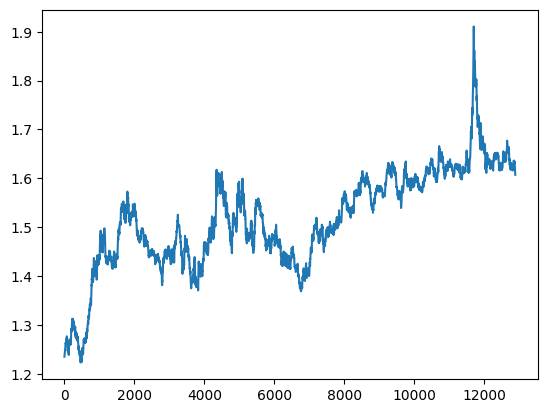

In [ ]:

lst_simple_avg=[]
for i in range(4,len(df.index)):
  lst_simple_avg.append(df.Close.iloc[(i-4):i].mean())
print(len(lst_simple_avg))


plt.plot(lst_simple_avg)

Cumulative moving average

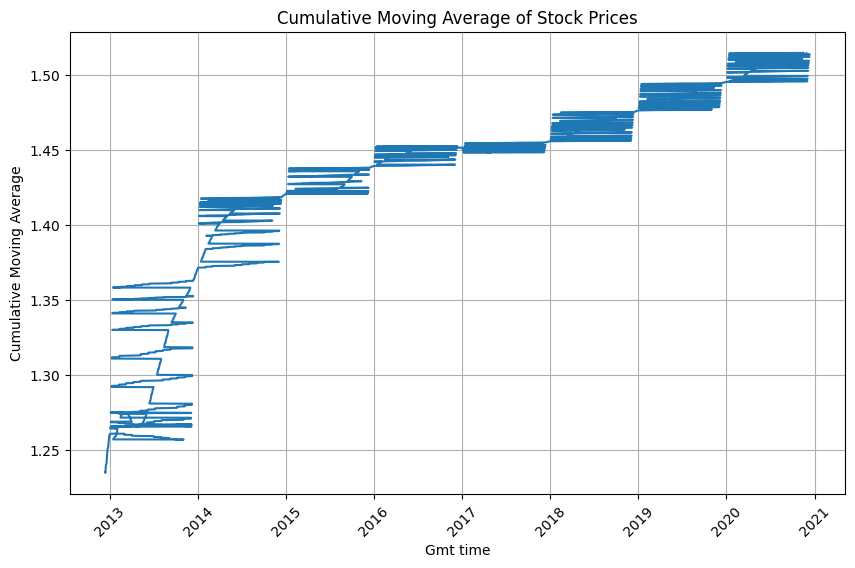

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['CMA'] = df['Close'].cumsum() / (df.index + 1)
plt.figure(figsize=(10, 6))
plt.plot(df['Gmt time'], df['CMA'])
plt.xlabel('Gmt time')
plt.ylabel('Cumulative Moving Average')
plt.title('Cumulative Moving Average of Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

12890


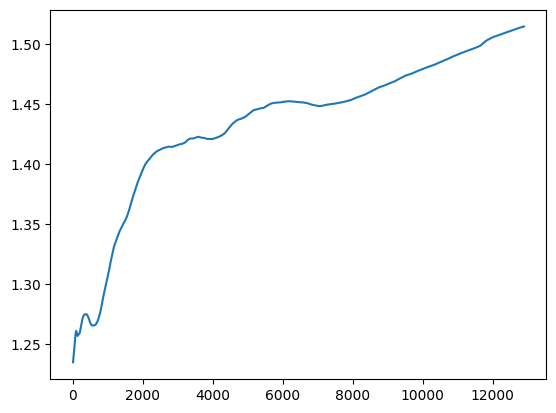

In [ ]:

lst_cum_avg=[]
for i in range(len(df.index)):
  lst_cum_avg.append(df.Close.iloc[0:i].mean())
print(len(lst_cum_avg))


plt.plot(lst_cum_avg)

Exponential moving average

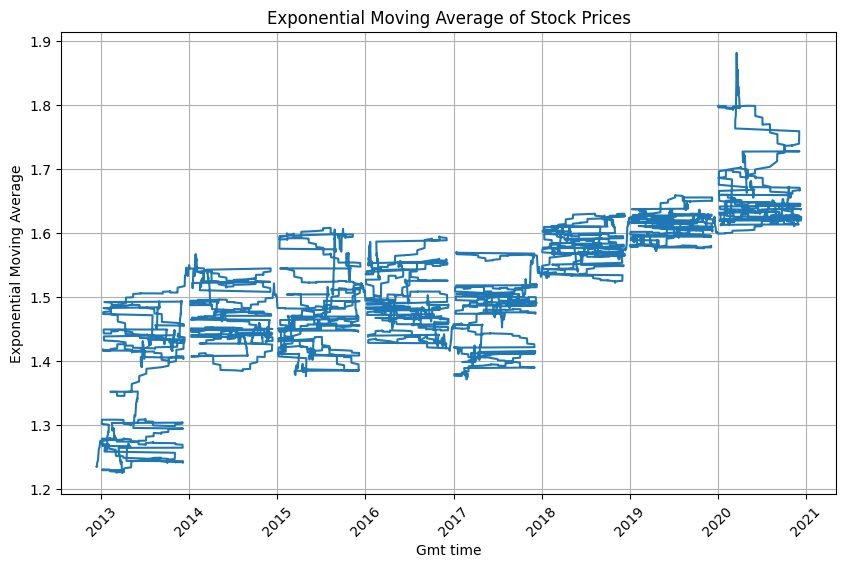

In [ ]:
# Calculate the exponential moving average
period = 10  # Define the period for the EMA calculation
df['EMA'] = df['Close'].ewm(span=period, adjust=False).mean()

# Plot the exponential average graph
plt.figure(figsize=(10, 6))
plt.plot(df['Gmt time'], df['EMA'])
plt.xlabel('Gmt time')
plt.ylabel('Exponential Moving Average')
plt.title('Exponential Moving Average of Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# MOVING AVERAGE, EXPONENTIAL MOVING AVERAGE, RSI, Cumlative MOving Average , Bolinger bands
# period 20,30,40